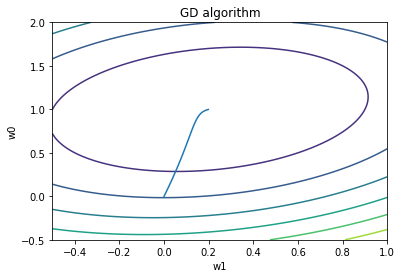

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('assignment1_data.csv',header=None)

x = df[0]
y = df[1]
N = len(x)
w = np.matrix([[0],[0],[0]])
R_x = np.matrix([[5, -1, -2],[-1, 5, -1],[-2, -1, 5]])
r_yx = np.matrix([[1],[5.3],[-3.9]])

alpha = 0.01
N = 100
W = np.zeros((3,N))


for i in range(1,N):
    w = w + 2*alpha *(r_yx-R_x*w)
    W[:,i] = w.A1

#plt.plot(W[0,:],W[1,:])
#plt.plot(W[0,:])
#plt.plot(W[1,:])
#plt.plot(W[2,:])

w0 = np.linspace(-0.5, 1, 100)
w1 = np.linspace(-0.5, 2, 100)
w2 = np.ones((len(w0)))*-0.5
#w = np.matrix([w0,w1,w2])
J = np.ones((100,100))*1

for i in range(100):
    for j in range(100):
        w = np.matrix([w0[i],w1[j],-0.5])
        w = w.T
        #print(w)
        J[j,i] = -w.T@r_yx -r_yx.T@w + w.T@R_x@w
        

#print(-w.T@r_yx)
#print(X)
plt.contour(np.array(w0), np.array(w1), J)
plt.plot(W[0,:],W[1,:])
plt.title('GD algorithm')
plt.ylabel('w0')
plt.xlabel('w1')
plt.savefig('Countour_GD_algo')


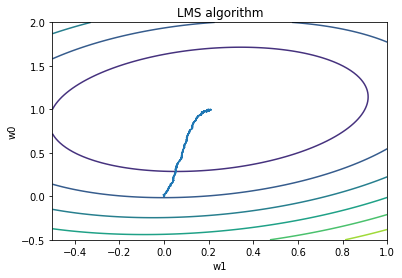

In [9]:
# least mean squares
x = df[0]
xT = x.T
y = df[1]
N = len(df)

alpha = 0.0001
w = np.matrix([[0],[0],[0]])
W2 = np.zeros((3,N))
for i in range(2,N):
    x_bar = np.matrix([[x[i]],[x[i-1]],[x[i-2]]])
    y_pred = w.T* x_bar
    e = y[i] - y_pred
    w = w+2*alpha*x_bar*e
    W2[:,i] = w.A1 

w0 = np.linspace(-0.5, 1, 100)
w1 = np.linspace(-0.5, 2, 100)
w2 = np.ones((len(w0)))*-0.5
#w = np.matrix([w0,w1,w2])
J = np.ones((100,100))*1

for i in range(100):
    for j in range(100):
        w = np.matrix([w0[i],w1[j],-0.5])
        w = w.T
        #print(w)
        J[j,i] = -w.T@r_yx -r_yx.T@w + w.T@R_x@w
        

#print(-w.T@r_yx)
#print(X)
plt.contour(np.array(w0), np.array(w1), J)
plt.plot(W2[0,:],W2[1,:])
plt.title('LMS algorithm')
plt.ylabel('w0')
plt.xlabel('w1')
plt.savefig('Contour_LMS_algo')

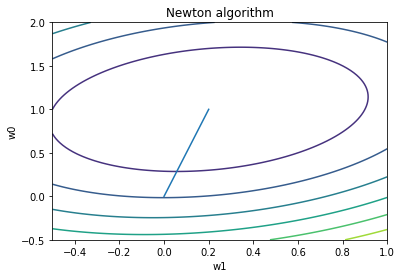

In [2]:
# Newton method
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('assignment1_data.csv',header=None)
N = len(df)
alpha = 0.01
w = np.matrix([[0],[0],[0]])
R_x = np.matrix([[5, -1, -2],[-1, 5, -1],[-2, -1, 5]])
r_yx = np.matrix([[1],[5.3],[-3.9]])

W1 = np.zeros((3,N))
for i in range(1,N):
    w = w+2*alpha*R_x**-1*(r_yx-R_x*w)
    W1[:,i] = w.A1
    
w0 = np.linspace(-0.5, 1, 100)
w1 = np.linspace(-0.5, 2, 100)
w2 = np.ones((len(w0)))*-0.5
#w = np.matrix([w0,w1,w2])
J = np.ones((100,100))*1

for i in range(100):
    for j in range(100):
        w = np.matrix([w0[i],w1[j],-0.5])
        w = w.T
        #print(w)
        J[j,i] = -w.T@r_yx -r_yx.T@w + w.T@R_x@w
        

#print(-w.T@r_yx)
#print(X)
plt.contour(np.array(w0), np.array(w1), J)
plt.plot(W1[0,:],W1[1,:])
plt.title('Newton algorithm')
plt.ylabel('w0')
plt.xlabel('w1')
plt.savefig('Contour_newton_algo')


3
[[2.84325217]
 [2.84325217]
 [2.84325217]]


NameError: name 'r_yx' is not defined

[[ 1. ]
 [ 2. ]
 [-0.5]]


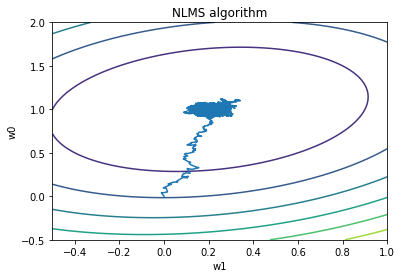

In [17]:
# Normalized least mean squares
x = df[0]
xT = x.T
y = df[1]
N = len(df)

alpha = 0.01
w = np.matrix([[0],[0],[0]])
W2 = np.zeros((3,N))
beta = 0.2
sigma2 = 0.01
for i in range(2,N):
    x_bar = np.matrix([[x[i]],[x[i-1]],[x[i-2]]])
    y_pred = w.T*x_bar
    e = y[i] - y_pred
    sigma2 = beta*sigma2+(1-beta)*(x_bar.T*x_bar)/len(w)
    w = w+2*alpha/sigma2[0,0]*x_bar*e
    W2[:,i] = w.A1

w0 = np.linspace(-0.5, 1, 100)
w1 = np.linspace(-0.5, 2, 100)
w2 = np.ones((len(w0)))*-0.5
#w = np.matrix([w0,w1,w2])
J = np.ones((100,100))*1

for i in range(100):
    for j in range(100):
        w = np.matrix([w0[i],w1[j],-0.5])
        w = w.T
        #print(w)
        J[j,i] = -w.T@r_yx -r_yx.T@w + w.T@R_x@w
        
print(w)

plt.contour(np.array(w0), np.array(w1), J)
plt.plot(W2[0,:],W2[1,:])
plt.title('NLMS algorithm')
plt.ylabel('w0')
plt.xlabel('w1')
plt.savefig('Contour_NLMS_algo')

[[ 0.20324058]
 [ 0.99427188]
 [-0.50062984]]


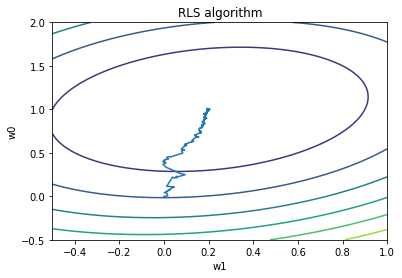

In [34]:
# Recursive Least Squares
x = df[0]
xT = x.T
y = df[1]
N = len(df)

alpha = 0.001
gamma = 1 - 10**(-4)
delta = 100
r_yx = np.matrix([[0],[0],[0]])
w = np.matrix([[0],[0],[0]])

R_x1 = 1/delta*np.eye((len(w)))
for i in range(2,N-1):
    x_bar = np.matrix([[x[i+1]],[x[i]],[x[i-1]]])
    g = R_x1*x_bar/(gamma**2+x_bar.T*R_x1*x_bar)
    R_x1 = gamma**(-2)*(R_x1-g*x_bar.T*R_x1)
    r_yx = gamma**2*r_yx+x_bar*y[i+1]
    w = R_x1*r_yx
    W2[:,i] = w.A1
    
print(w)

w0 = np.linspace(-0.5, 1, 100)
w1 = np.linspace(-0.5, 2, 100)
w2 = np.ones((len(w0)))*-0.5
#w = np.matrix([w0,w1,w2])
J = np.ones((100,100))*1

R_x = np.matrix([[5, -1, -2],[-1, 5, -1],[-2, -1, 5]])
r_yx = np.matrix([[1],[5.3],[-3.9]])

for i in range(100):
    for j in range(100):
        w = np.matrix([w0[i],w1[j],-0.5])
        w = w.T
        J[j,i] = -w.T@r_yx -r_yx.T@w + w.T@R_x@w

plt.contour(np.array(w0), np.array(w1), J)
plt.plot(W2[0,:],W2[1,:])
plt.title('RLS algorithm')
plt.ylabel('w0')
plt.xlabel('w1')
plt.savefig('Contour_RLS_algo')